In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, binplot
import pycalphad.variables as v
from binary_helpers import plot_convex_hull

# Load database and choose the phases that will be considered
dbf = Database('Cr-Fe-ref2.TDB')
comps = ['CR', 'FE', 'VA']
phases = sorted(dbf.phases)

eq_alni = equilibrium(dbf, ['CR', 'FE', 'VA'], phases, {v.X('FE'): 0.5, v.T: (300, 2500, 20), v.P: 101325})
print(eq_alni['T'])
print(eq_alni['NP'])

<xarray.DataArray 'T' (T: 110)>
array([ 300.,  320.,  340.,  360.,  380.,  400.,  420.,  440.,  460.,  480.,
        500.,  520.,  540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,
        700.,  720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
        900.,  920.,  940.,  960.,  980., 1000., 1020., 1040., 1060., 1080.,
       1100., 1120., 1140., 1160., 1180., 1200., 1220., 1240., 1260., 1280.,
       1300., 1320., 1340., 1360., 1380., 1400., 1420., 1440., 1460., 1480.,
       1500., 1520., 1540., 1560., 1580., 1600., 1620., 1640., 1660., 1680.,
       1700., 1720., 1740., 1760., 1780., 1800., 1820., 1840., 1860., 1880.,
       1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040., 2060., 2080.,
       2100., 2120., 2140., 2160., 2180., 2200., 2220., 2240., 2260., 2280.,
       2300., 2320., 2340., 2360., 2380., 2400., 2420., 2440., 2460., 2480.])
Coordinates:
  * T        (T) float64 300.0 320.0 340.0 360.0 ... 2.44e+03 2.46e+03 2.48e+03
<xarray.DataArray 'NP' (N: 

[]
[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[]
[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


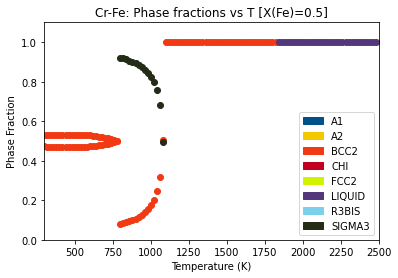

In [2]:
from pycalphad.plot.utils import phase_legend
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Cr-Fe: Phase fractions vs T [X(Fe)=0.5]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300, 2500))

for name in phases:
    phase_indices = np.nonzero(eq_alni.Phase.values == name)
    print(phase_indices[1])
    plt.scatter(np.take(eq_alni['T'].values, phase_indices[2]), eq_alni.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='lower right')

In [21]:
from pycalphad import Database, equilibrium, Model, ReferenceState, variables as v
import matplotlib.pyplot as plt
import numpy as np

dbf = Database("Cr-Fe-ref2.TDB")
comps = ["CR", "FE", "VA"]
phases = dbf.phases.keys()
print(phases)
# Create reference states
Cr_ref = ReferenceState("CR","FCC2", {v.T: 298.15, v.P: 101325})
Fe_ref = ReferenceState("FE", "FCC2", {v.T: 298.15, v.P: 101325})


dict_keys(['LIQUID', 'A1', 'A2', 'BCC2', 'CHI', 'FCC2', 'R3BIS', 'SIGMA3'])


In [23]:
# Create the models for each phase and shift them all by the same reference states.
eq_models = {}
for phase_name in phases:
    mod = Model(dbf, comps, phase_name)
    mod.shift_reference_state([Cr_ref, Fe_ref], dbf)
    eq_models[phase_name] = mod
print(eq_models)

{'LIQUID': <pycalphad.model.Model object at 0x7fdb931d57d0>, 'A1': <pycalphad.model.Model object at 0x7fdb92828f90>, 'A2': <pycalphad.model.Model object at 0x7fdb92a103d0>, 'BCC2': <pycalphad.model.Model object at 0x7fdb9273d250>, 'CHI': <pycalphad.model.Model object at 0x7fdb93a0fd50>, 'FCC2': <pycalphad.model.Model object at 0x7fdbf06e3550>, 'R3BIS': <pycalphad.model.Model object at 0x7fdb9255ec10>, 'SIGMA3': <pycalphad.model.Model object at 0x7fdb924c83d0>}


In [41]:
# Calculate HMR at 2800 K from X(RE)=0 to X(RE)=1
conds = {v.P: 101325, v.T: 900, v.X("FE"): (0, 1, 0.01)}
result = equilibrium(dbf, comps, phases, conds, output="HMR", model=eq_models)
print(result)
# Find the groups of unique phases in equilibrium e.g. [CHI_RENB] and [CHI_RENB, HCP_RENB]
unique_phase_sets = np.unique(result.Phase.values.squeeze(), axis=0)
print(unique_phase_sets)

<xarray.Dataset>
Dimensions:    (N: 1, P: 1, T: 1, X_FE: 100, component: 2, internal_dof: 2, vertex: 3)
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 900.0
  * X_FE       (X_FE) float64 1e-12 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U2 'CR' 'FE'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_FE, vertex) float64 1.0 nan nan 1.0 ... 1.0 nan nan
    GM         (N, P, T, X_FE) float64 -1.718e+04 -1.782e+04 ... -2.87e+04
    MU         (N, P, T, X_FE, component) float64 -1.718e+04 ... -2.847e+04
    X          (N, P, T, X_FE, vertex, component) float64 1.0 1e-12 ... nan nan
    Y          (N, P, T, X_FE, vertex, internal_dof) float64 1.0 1e-12 ... nan
    Phase      (N, P, T, X_FE, vertex) <U6 'LIQUID' '' '' ... 'LIQUID' '' ''
    HMR        (N, P, T, X_FE) float64 3.449e+04 3.439e+04 ... 3.038e+04
Attributes:
    engine:  

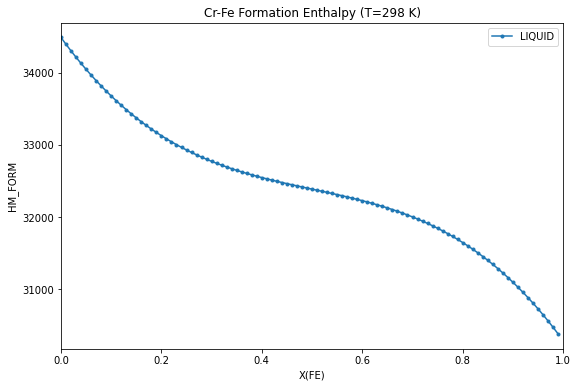

In [42]:
# Plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for phase_set in unique_phase_sets:
    label = '+'.join([ph for ph in phase_set if ph != ''])
    # composition indices with the same unique phase
    unique_phase_idx = np.nonzero(np.all(result.Phase.values.squeeze() == phase_set, axis=1))[0]
    masked_result = result.isel(X_FE=unique_phase_idx)
    ax.plot(masked_result.X_FE.squeeze(), masked_result.HMR.squeeze(), marker='.', label=label)
ax.set_xlim((0, 1))
ax.set_xlabel('X(FE)')
ax.set_ylabel('HM_FORM')
ax.set_title('Cr-Fe Formation Enthalpy (T=298 K)')
ax.legend()
plt.show()

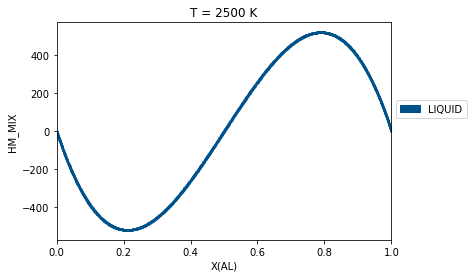

In [37]:
from pycalphad.plot.utils import phase_legend
import matplotlib.patches as mpatches

for T in [2500]:
    legend_handles, color_dict = phase_legend(phases)
    plt.figure()
    # Loop over phases, calculate the Gibbs energy, and scatter plot GM vs. X(SN)
    phases=['LIQUID']
    for phase_name in phases:
        result = calculate(dbf, comps, phase_name, P=101325, T=T, N=1, output='HM_MIX')
        plt.scatter(result.X.sel(component='FE'), result.HM_MIX, marker='.', s=5, color=color_dict[phase_name], label=phase_name)

    # Format the plot
    plt.title(f'T = {T} K')
    plt.xlabel('X(AL)')
    plt.ylabel('HM_MIX')
    plt.xlim((0, 1))
    plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
    plt.show()

In [ ]:
%%time
binplot(dbf, comps,  dbf.phases.keys(), {v.X('FE'): (0,1,0.01), v.T: (500, 2500, 25), v.P:101325, v.N: 1}, plot_kwargs={'scatter': False})